In [ ]:
#---------------------------------------------------------recreating Splay Tree to recreate priority queue----------------------------------------------------

class Node:
	def  __init__(self, nodeValue):
		self.nodeValue = nodeValue;
		self.parentNode = None;
		self.leftNode = None;
		self.rightNode = None;



class SplayTree:
	def __init__(self):
		self.rootNode = None;
		


	def insertNode(self, insertedNodeValue, tupleIndex):
		newNode =  Node(insertedNodeValue);
		tempNode1 = self.rootNode;
		tempNode2 = None;

		while tempNode1 != None:
			tempNode2 = tempNode1;

			if tupleIndex > -1:
				if newNode.nodeValue[tupleIndex] < tempNode1.nodeValue[tupleIndex]:
					tempNode1 = tempNode1.leftNode;
				else:
					tempNode1 = tempNode1.rightNode;
			else:
				if newNode.nodeValue < tempNode1.nodeValue:
					tempNode1 = tempNode1.leftNode;
				else:
					tempNode1 = tempNode1.rightNode;

		newNode.parentNode = tempNode2;

		if tupleIndex > -1:
			if tempNode2 == None:
				self.rootNode = newNode;
			elif newNode.nodeValue[tupleIndex] < tempNode2.nodeValue[tupleIndex]:
				tempNode2.leftNode = newNode;
			else:
				tempNode2.rightNode = newNode;
		else:
			if tempNode2 == None:
				self.rootNode = newNode;
			elif newNode.nodeValue < tempNode2.nodeValue:
				tempNode2.leftNode = newNode;
			else:
				tempNode2.rightNode = newNode;

		self.splayTree(newNode);



	def deleteNode(self, deletedNodeValue, tupleIndex, printError):
		tempNode1 = None;
		tempNode2 = None; 
		tempNode3 = None;

		while self.rootNode != None:
			if(tupleIndex > -1):
				if self.rootNode.nodeValue[tupleIndex] == deletedNodeValue:
					tempNode1 = self.rootNode;

				if self.rootNode.nodeValue[tupleIndex] <= deletedNodeValue:
					self.rootNode = self.rootNode.rightNode;
				else:
					self.rootNode = self.rootNode.leftNode;
			else:
				if self.rootNode.nodeValue == deletedNodeValue:
					tempNode1 = self.rootNode;

				if self.rootNode.nodeValue <= deletedNodeValue:
					self.rootNode = self.rootNode.rightNode;
				else:
					self.rootNode = self.rootNode.leftNode;

		if tempNode1 == None:
			if printError:
				print("Error: Could Not Find Node To Delete In Splay Tree...");
			tempNode1 == None;
		else:
			self.splayTree(tempNode1)
	 
			if tempNode1.rightNode != None:
				tempNode2 = tempNode1.rightNode;
				tempNode2.parentNode = None;

			else:
				tempNode2 = None;

			tempNode3 = tempNode1;
			tempNode3.rightNode = None;
			tempNode1 = None;

			if tempNode3.leftNode != None:
				tempNode3.leftNode.parentNode = None;

			self.rootNode = self.combineSplayTrees(tempNode3.leftNode, tempNode2);
			tempNode3 = None;



	def rotateLeft(self, rotationNode):
		tempNode = rotationNode.rightNode;
		rotationNode.rightNode = tempNode.leftNode;
		if tempNode.leftNode != None:
			tempNode.leftNode.parentNode = rotationNode;

		tempNode.parentNode = rotationNode.parentNode
		if rotationNode.parentNode == None:
			self.rootNode = tempNode;

		elif rotationNode == rotationNode.parentNode.leftNode:
			rotationNode.parentNode.leftNode = tempNode;

		else:
			rotationNode.parentNode.rightNode = tempNode;
		tempNode.leftNode = rotationNode;
		rotationNode.parentNode = tempNode;



	def rotateRight(self, rotationNode):
		tempNode = rotationNode.leftNode;
		rotationNode.leftNode = tempNode.rightNode;
		if tempNode.rightNode != None:
			tempNode.rightNode.parentNode = rotationNode;
		
		tempNode.parentNode = rotationNode.parentNode;
		if rotationNode.parentNode == None:
			self.rootNode = tempNode;

		elif rotationNode == rotationNode.parentNode.rightNode:
			rotationNode.parentNode.rightNode = tempNode;

		else:
			rotationNode.parentNode.leftNode = tempNode;
		
		tempNode.rightNode = rotationNode;
		rotationNode.parentNode = tempNode;



	def splayTree(self, newRootNode):
		while newRootNode.parentNode != None:
			if newRootNode.parentNode.parentNode == None:
				if newRootNode == newRootNode.parentNode.leftNode:
					#do zig rotation
					self.rotateRight(newRootNode.parentNode);

				else:
					#do zag rotation
					self.rotateLeft(newRootNode.parentNode);

			elif newRootNode == newRootNode.parentNode.leftNode and newRootNode.parentNode == newRootNode.parentNode.parentNode.leftNode:
				#do zig-zig rotation
				self.rotateRight(newRootNode.parentNode.parentNode);
				self.rotateRight(newRootNode.parentNode);

			elif newRootNode == newRootNode.parentNode.rightNode and newRootNode.parentNode == newRootNode.parentNode.parentNode.rightNode:
				#do zag-zag rotation
				self.rotateLeft(newRootNode.parentNode.parentNode);
				self.rotateLeft(newRootNode.parentNode);

			elif newRootNode == newRootNode.parentNode.rightNode and newRootNode.parentNode == newRootNode.parentNode.parentNode.leftNode:
				#do zig-zag rotation
				self.rotateLeft(newRootNode.parentNode);
				self.rotateRight(newRootNode.parentNode);

			else:
				#do zag-zig rotation
				self.rotateRight(newRootNode.parentNode);
				self.rotateLeft(newRootNode.parentNode);



	def combineSplayTrees(self, SplayTree1, SplayTree2):
		if SplayTree1 == None:
			return SplayTree2;

		if SplayTree2 == None:
			return SplayTree1;

		tempNode = self.getMaximumValuedNode(SplayTree1);
		self.splayTree(tempNode);
		tempNode.rightNode = SplayTree2;
		SplayTree2.parentNode = tempNode;
		return tempNode;



	def printPreOrder(self, currentNode):
		if currentNode != None:
			print(currentNode.nodeValue);
			self.printPreOrder(currentNode.leftNode);
			self.printPreOrder(currentNode.rightNode);



	def printInOrderAccending(self, currentNode):
		if currentNode != None:
			self.printInOrderAccending(currentNode.leftNode);
			print(currentNode.nodeValue);
			self.printInOrderAccending(currentNode.rightNode);



	def printInOrderDecending(self, currentNode):
		if currentNode != None:
			self.printInOrderDecending(currentNode.rightNode);
			print(currentNode.nodeValue);
			self.printInOrderDecending(currentNode.leftNode);



	def printPostOrder(self, currentNode):
		if currentNode != None:
			self.printPostOrder(currentNode.leftNode);
			self.printPostOrder(currentNode.rightNode);
			print(currentNode.nodeValue);



	def getRootNode(self):
		return self.rootNode;



	def deleteAllNodes(self):
		self.deleteMostNodes(self.rootNode);
		self.rootNode = None;



	def deleteMostNodes(self, currentNode):
		if(currentNode != None):
			self.deleteMostNodes(currentNode.leftNode);
			self.deleteMostNodes(currentNode.rightNode);
			currentNode = None;
		else:
			return;



	def getSize(self, currentNode):
		if currentNode == None:
			return 0;
		else:
			return self.getSize(currentNode.leftNode) + 1 + self.getSize(currentNode.rightNode);



	def getTotalValue(self, currentNode, tupleIndex):
		if currentNode == None:
			return 0;
		else:
			if(tupleIndex > -1):
				return self.getTotalValue(currentNode.leftNode, tupleIndex) + currentNode.nodeValue[tupleIndex] + self.getTotalValue(currentNode.rightNode, tupleIndex);
			else:
				return self.getTotalValue(currentNode.leftNode, tupleIndex) + currentNode.nodeValue + self.getTotalValue(currentNode.rightNode, tupleIndex);



	def getNodeFromValue(self, currentNode, searchingNodeValue, tupleIndex, printError):
		if(tupleIndex > -1):
			if currentNode == None:
				if printError:
					print("Error: Node You Are Searching For Does Not Exist In This Splay Tree...");
				return None;
			elif searchingNodeValue == currentNode.nodeValue[tupleIndex]:
				return currentNode;

			if searchingNodeValue < currentNode.nodeValue[tupleIndex]:
				return self.getNodeFromValue(currentNode.leftNode, searchingNodeValue, tupleIndex, printError)
			elif searchingNodeValue > currentNode.nodeValue[tupleIndex]:	
				return self.getNodeFromValue(currentNode.rightNode, searchingNodeValue, tupleIndex, printError)
		else:
			if currentNode == None:
				if printError:
					print("Error: Node You Are Searching For Does Not Exist In This Splay Tree...");
				return None;
			elif searchingNodeValue == currentNode.nodeValue:
				return currentNode;

			if searchingNodeValue < currentNode.nodeValue:
				return self.getNodeFromValue(currentNode.leftNode, searchingNodeValue, tupleIndex, printError)
			elif searchingNodeValue > currentNode.nodeValue:	
				return self.getNodeFromValue(currentNode.rightNode, searchingNodeValue, tupleIndex, printError)



	def getMaximumValuedNode(self, currentNode):
		if(currentNode != None):
			while currentNode.rightNode != None:
				currentNode = currentNode.rightNode;
		
			return currentNode;


	def getMinimumValuedNode(self, currentNode):
		if(currentNode != None):
			while currentNode.leftNode != None:
				currentNode = currentNode.leftNode;
		return currentNode;


In [ ]:
#----------------------------------------------------------------all of this code is for reading the parameters from a file------------------------------------------------------------------

#so you can read files from google drive (requires you to log into gmail account and grant access)
from google.colab import drive
drive.mount('/content/drive')

#see all files in Google Drive
#!ls "/content/drive/My Drive/"

class FileReader:
  def __init__(self, fileName):
    self.fileName = fileName;



  def testFile(self):
    try:
        inputFile = open(('/content/drive/My Drive/' + self.fileName + '.txt'),'r');
        return True;
    except:
        print("Error: File Not Found!");
        return False;



  def getFileList(self):
     inputFile = open(('/content/drive/My Drive/' + self.fileName + '.txt'),'r');
     return inputFile.readlines(); 



  def getFileSize(self):
    inputFile = open(('/content/drive/My Drive/' + self.fileName + '.txt'),'r');
    return len(inputFile.readlines());



  def getNumberofParameters(self):
    inputFile = open(('/content/drive/My Drive/' + self.fileName + '.txt'),'r');
    inputFileArray = inputFile.readlines();
    counter = 0;

    for i in range(len(inputFileArray)):
      if inputFileArray[i].find("=") != -1:
        counter += 1;

    return counter;



  def getParameter(self, parameterName):
     inputFile = open(('/content/drive/My Drive/' + self.fileName + '.txt'),'r');   
     inputFileArray = inputFile.readlines();

     for i in range(len(inputFileArray)):
       if inputFileArray[i].find(parameterName) != -1:
         variableString = inputFileArray[i];

         variableString = variableString.rstrip('\n'); #remove new line character
         variableString = variableString.lstrip('\ufeff'); #remove weird character from first element
         variableString = variableString.rstrip(';'); #remove semi-colon

         variableString = variableString[(len(parameterName)+ 2):]; #get value of expression
         if variableString.find(".") == -1:
          return int(variableString);
         else:
          return float(variableString); 
     print("Error: Variable Not Found In Input File! Returning Value Of 1...");
     return 1;


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#------------------------------------------------------import numpy for all of the random distributions including pareto and poisson----------------------------------------------------
import numpy as np;

In [ ]:
#--------------------------------------------------------------------all of this code is for actually creating the simulation----------------------------------------------------------------------
import matplotlib.pyplot as plt;
import seaborn as sns;
import random;

class CacheSimulator:

#Constructor:
  def __init__(self):
      #default variables for simulation:
      self.totalFiles = 10000;
      self.cacheSize = 1000; #in Mb or megabits (divide by 8 for that in bytes)     
      self.fileRequestRate = 1000; #in requests per second (for poisson distribution)
      self.fileSizeMean = 1;  #in MB or megabytes (for pareto distribution)
      self.filePopularityMean = 1;
      self.networkBandwidth = 500; #in Mb or megabits per second (divide by 8 for that in bytes) or Rc
      self.inboundBandwidth = 15; #in Mb or megabits per second (divide by 8 for that in bytes) or Ra
      self.totalRequests = 10000;
      self.D_StandardDeviation = 0.4;
      self.D_Mean = 0.5;

      self.cacheMisses = 0;

      self.FIFOqueue = [];
      self.fileCache = SplayTree();
      self.priorityQueue = SplayTree();
      
      self.ticksPerSecond = 60;

      self.cacheSize /= 8; #convert from bits to bytes
      self.networkBandwidth /= 8; #convert from bits to bytes
      self.inboundBandwidth /= 8; #convert from bits to bytes
      self.fileSizes = np.random.pareto(a = self.fileSizeMean, size = self.totalFiles); #or Si
      self.currentReplacementPolicy = "";
      self.filePopularity = np.random.pareto(a = self.fileSizeMean, size = self.totalRequests);
      totalFilePopularity = 0;
      for i in range(self.totalRequests):
        totalFilePopularity += self.filePopularity[i];
      for i in range(self.totalRequests):
        self.filePopularity[i] /= totalFilePopularity;
      self.filesRequested = np.random.choice(a = np.random.poisson(lam = self.fileRequestRate, size = self.totalRequests), size = self.totalRequests, p = self.filePopularity);

      self.timeBetweenFileRequests = [];



#Set Parameters:
  def setParameters(self, totalFiles, totalRequests, cacheSize, fileRequestRate, fileSizeMean, filePopularityMean, networkBandwidth, inboundBandwidth, D_StandardDeviation, D_Mean):
    self.totalFiles = totalFiles;
    self.totalRequests = totalRequests;
    self.cacheSize = cacheSize;
    self.fileRequestRate = fileRequestRate;
    self.fileSizeMean = fileSizeMean;
    self.filePopularityMean = filePopularityMean;
    self.networkBandwidth = networkBandwidth;
    self.inboundBandwidth = inboundBandwidth;     
    self.D_StandardDeviation = D_StandardDeviation;
    self.D_Mean = D_Mean;

    self.cacheSize /= 8; #convert from bits to bytes
    self.networkBandwidth /= 8; #convert from bits to bytes
    self.inboundBandwidth /= 8; #convert from bits to bytes



#File Reading:
  def getInputFileParameters(self, fileName):
      self.fileReader = FileReader(fileName);

      if(self.fileReader.testFile()):
        #Test if input file exists and contains the right amount of parameters
        totalParameters = 10; 
     
        if self.fileReader.getNumberofParameters() != totalParameters:
          #Print correct error message
          if self.fileReader.getNumberofParameters() > totalParameters:
            if(self.fileReader.getNumberofParameters() - totalParameters == 1):
              print("Error: Invalid Number Of Parameters In File: 1 Extra Parameter!");
            else:
              print("Error: Invalid Number Of Parameters In File:", (self.fileReader.getNumberofParameters() - totalParameters), "Extra Parameters!");
          else:
            if(totalParameters - self.fileReader.getNumberofParameters() == 1):
              print("Error: Invalid Number Of Parameters In File: 1 Missing Parameter!");
            else:
              print("Error: Invalid Number Of Parameters In File:", (totalParameters - self.fileReader.getNumberofParameters()), "Missing Parameters!");
          print("Using Default Parameters...");

        else:
          #Assigns parameters from input file to correct parameter
          self.totalFiles = self.fileReader.getParameter("totalFiles");
          self.totalRequests = self.fileReader.getParameter("totalRequests");
          self.cacheSize = self.fileReader.getParameter("cacheSize");
          self.fileRequestRate = self.fileReader.getParameter("fileRequestRate");
          self.filePopularityMean = self.fileReader.getParameter("filePopularityMean");
          self.fileSizeMean = self.fileReader.getParameter("fileSizeMean");
          self.networkBandwidth = self.fileReader.getParameter("networkBandwidth");
          self.inboundBandwidth = self.fileReader.getParameter("inboundBandwidth");        
          self.D_StandardDeviation = self.fileReader.getParameter("D_StandardDeviation");
          self.D_Mean = self.fileReader.getParameter("D_Mean");  

          self.cacheSize /= 8; #convert from bits to bytes
          self.networkBandwidth /= 8; #convert from bits to bytes
          self.inboundBandwidth /= 8; #convert from bits to bytes
      else:
        #Error Message
        print("Using Default Parameters...");



#Helper Functions:
  def detectFileInCache(self, fileIndexValue):
      if(self.currentReplacementPolicy == "largestFirst"):
        return self.fileCache.getNodeFromValue(self.fileCache.getRootNode(), self.fileSizes[fileIndexValue], 1, False) != None;

      elif(self.currentReplacementPolicy == "leastpopularFirst"):
        return self.fileCache.getNodeFromValue(self.fileCache.getRootNode(), self.filePopularity[fileIndexValue], 2, False) != None;

      elif(self.currentReplacementPolicy == "smallestFirst"):
        return self.fileCache.getNodeFromValue(self.fileCache.getRootNode(), self.fileSizes[fileIndexValue], 1, False) != None;

      elif(self.currentReplacementPolicy == "mostpopularFirst"):
        return self.fileCache.getNodeFromValue(self.fileCache.getRootNode(), self.filePopularity[fileIndexValue], 2, False) != None;

      elif(self.currentReplacementPolicy == "randomFirst"):
        return self.fileCache.getNodeFromValue(self.fileCache.getRootNode(), self.fileSizes[fileIndexValue], 1, False) != None;

      else:
        print("Error: Invalid Replacement Policy")



#Cache Replacement Functions:
  def leastpopularFirstReplacementAlgorithm(self, newFileRequestIndex):
    if self.fileSizes[newFileRequestIndex] <= self.cacheSize:
      while(self.fileCache.getRootNode() != None and (self.fileCache.getTotalValue(self.fileCache.getRootNode(), 1) + self.fileSizes[newFileRequestIndex]) > self.cacheSize):
        self.fileCache.deleteNode(self.fileCache.getMinimumValuedNode(self.fileCache.getRootNode()).nodeValue[2], 2, False);

      self.fileCache.insertNode((newFileRequestIndex, self.fileSizes[newFileRequestIndex], self.filePopularity[newFileRequestIndex]), 2);
    else:
      self.cacheMisses += 1;
      #print("Error: File too Large for Cache");



  def mostpopularFirstReplacementAlgorithm(self, newFileRequestIndex):
    if self.fileSizes[newFileRequestIndex] <= self.cacheSize:
      while(self.fileCache.getRootNode() != None and (self.fileCache.getTotalValue(self.fileCache.getRootNode(), 1) + self.fileSizes[newFileRequestIndex]) > self.cacheSize):
        self.fileCache.deleteNode(self.fileCache.getMaximumValuedNode(self.fileCache.getRootNode()).nodeValue[2], 2, False);
      
      self.fileCache.insertNode((newFileRequestIndex, self.fileSizes[newFileRequestIndex], self.filePopularity[newFileRequestIndex]), 2);
    else:
      self.cacheMisses += 1;
      #print("Error: File too Large for Cache");



  def largestFirstReplacementAlgorithm(self, newFileRequestIndex):
    if self.fileSizes[newFileRequestIndex] <= self.cacheSize:
      while(self.fileCache.getRootNode() != None and (self.fileCache.getTotalValue(self.fileCache.getRootNode(), 1) + self.fileSizes[newFileRequestIndex]) > self.cacheSize):
        self.fileCache.deleteNode(self.fileCache.getMaximumValuedNode(self.fileCache.getRootNode()).nodeValue[1], 1, False);

      self.fileCache.insertNode((newFileRequestIndex, self.fileSizes[newFileRequestIndex]), 1);
    else:
      self.cacheMisses += 1;
      #print("Error: File too Large for Cache");

    #print(self.fileCache.printInOrderDecending(self.fileCache.getRootNode()));


  def smallestFirstReplacementAlgorithm(self, newFileRequestIndex):
    if self.fileSizes[newFileRequestIndex] <= self.cacheSize:
      while(self.fileCache.getRootNode() != None and (self.fileCache.getTotalValue(self.fileCache.getRootNode(), 1) + self.fileSizes[newFileRequestIndex]) > self.cacheSize):
        self.fileCache.deleteNode(self.fileCache.getMinimumValuedNode(self.fileCache.getRootNode()).nodeValue[1], 1, False);

      self.fileCache.insertNode((newFileRequestIndex, self.fileSizes[newFileRequestIndex]), 1);
    else:
      self.cacheMisses += 1;
      #print("Error: File too Large for Cache");



  def randomFirstReplacementAlgorithm(self, newFileRequestIndex):
    if self.fileSizes[newFileRequestIndex] <= self.cacheSize:
      while(self.fileCache.getRootNode() != None and (self.fileCache.getTotalValue(self.fileCache.getRootNode(), 1) + self.fileSizes[newFileRequestIndex]) > self.cacheSize):
        try:
          self.fileCache.deleteNode(self.fileCache.getNodeFromValue(self.fileCache.getRootNode(), self.fileSizes[random.randint(0, len(self.fileSizes))], 1, False).nodeValue[1], 1, False);
        except:
          break;

      self.fileCache.insertNode((newFileRequestIndex, self.fileSizes[newFileRequestIndex]), 1);
    else:
      self.cacheMisses += 1;
      #print("Error: File too Large for Cache");


#Events:
  def new_requestEvent(self, currentEventTime, fileRequested, startingEventTime):
    if self.detectFileInCache(fileRequested):
        self.priorityQueue.insertNode(((currentEventTime + self.fileSizes[fileRequested]/(self.networkBandwidth * self.ticksPerSecond)), "file_recievedEvent", fileRequested, startingEventTime), 0);
    else:
        D = np.random.lognormal(mean = D_Mean, sigma = D_StandardDeviation);
        self.priorityQueue.insertNode(((currentEventTime + (D * self.ticksPerSecond)), "arrive_at_queueEvent", fileRequested, startingEventTime), 0);

        #X = np.random.exponential(scale = (self.fileRequestRate * self.ticksPerSecond));
        #self.priorityQueue.insertNode(((currentEventTime + (X)), "new_requestEvent", fileRequested, startingEventTime), 0);



  def file_recievedEvent(self, currentEventTime, fileRequested, startingEventTime):
    #print(fileRequested, currentEventTime - startingEventTime, "Ticks");
    return (currentEventTime - startingEventTime);



  def arrive_at_queueEvent(self, currentEventTime, fileRequested, startingEventTime):
    if(len(self.FIFOqueue) == 0):
       self.priorityQueue.insertNode(((currentEventTime + (self.fileSizes[fileRequested]/(self.inboundBandwidth * self.ticksPerSecond))), "depart_queueEvent", fileRequested, startingEventTime), 0);
   
    self.FIFOqueue.append((fileRequested, startingEventTime));


  def depart_queueEvent(self, currentEventTime, fileRequested, startingEventTime):
    self.FIFOqueue.pop(0);
    
    if not self.detectFileInCache(fileRequested):
      if(self.currentReplacementPolicy == "largestFirst"):
        self.largestFirstReplacementAlgorithm(fileRequested);

      elif(self.currentReplacementPolicy == "leastpopularFirst"):
        self.leastpopularFirstReplacementAlgorithm(fileRequested);

      elif(self.currentReplacementPolicy == "smallestFirst"):
        self.smallestFirstReplacementAlgorithm(fileRequested);

      elif(self.currentReplacementPolicy == "mostpopularFirst"):
        self.mostpopularFirstReplacementAlgorithm(fileRequested);

      elif(self.currentReplacementPolicy == "randomFirst"):
        self.randomFirstReplacementAlgorithm(fileRequested);

    self.priorityQueue.insertNode(((currentEventTime + (self.fileSizes[fileRequested]/(self.networkBandwidth * self.ticksPerSecond))), "file_recievedEvent", fileRequested, startingEventTime), 0);

    if(len(self.FIFOqueue) > 0):
       j = self.FIFOqueue[0];
       self.priorityQueue.insertNode(((currentEventTime + (self.fileSizes[j[0]]/(self.inboundBandwidth * self.ticksPerSecond))), "depart_queueEvent", j[0], j[1]), 0);

    #print(len(self.FIFOqueue));


#Simulation:
  def simulate(self, replacementPolicy, overridePreviousParameters, printTime, decimalPoints):
    self.currentReplacementPolicy = replacementPolicy;
  
    if(overridePreviousParameters):
      #file sizes calculations:
      self.fileSizes = np.random.pareto(a = self.fileSizeMean, size = self.totalFiles); #or Si

      #file popularity calculations:
      self.filePopularity = np.random.pareto(a = self.fileSizeMean, size = self.totalFiles);
      totalFilePopularity = 0;

      for i in range(self.totalFiles):
        totalFilePopularity += self.filePopularity[i];

      for i in range(self.totalFiles):
        self.filePopularity[i] /= totalFilePopularity;

      allFileIndexes = [];
      for i in range(self.totalFiles):
          allFileIndexes.append(i);

      self.filesRequested = np.random.choice(replace = True, a = allFileIndexes, size = self.totalRequests, p = self.filePopularity);   
    
      self.timeBetweenFileRequests = np.random.exponential(scale = (1/self.fileRequestRate), size = self.totalRequests); #exponential is the inverse of the poisson distribution

    #event handling:
    setTick = 0;
    totalResponseTime = 0; 
    for i in range(self.totalRequests):             
      setTick += self.timeBetweenFileRequests[i];
      self.priorityQueue.insertNode((setTick, "new_requestEvent", (int)(self.filesRequested[i]), setTick), 0);
    #self.priorityQueue.printInOrderAccending(self.priorityQueue.getRootNode());

    while(self.priorityQueue.getRootNode() != None and self.cacheMisses < 1000):
      #print("Priority Queue:");
      #self.priorityQueue.printInOrderAccending(self.priorityQueue.getRootNode());

      event = self.priorityQueue.getMinimumValuedNode(self.priorityQueue.getRootNode()).nodeValue;
      self.priorityQueue.deleteNode(self.priorityQueue.getMinimumValuedNode(self.priorityQueue.getRootNode()).nodeValue[0], 0, True);

      if(event[1] == "new_requestEvent"):
        self.new_requestEvent(event[0], event[2], event[3]);

      elif (event[1] == "file_recievedEvent"):
        totalResponseTime += (self.file_recievedEvent(event[0], event[2], event[3]) / self.ticksPerSecond);

      elif (event[1] == "arrive_at_queueEvent"):        
        self.arrive_at_queueEvent(event[0], event[2], event[3]);

      elif (event[1] == "depart_queueEvent"):
        self.depart_queueEvent(event[0], event[2], event[3]);
      
      #print("File Cache: ");
      #self.fileCache.printInOrderDecending(self.fileCache.getRootNode());

      #print("FIFO Queue: ")
      #print(self.FIFOqueue);

    #get average and round to two decimal points for ease of readability and convert to appropriate time scale (for fun):
    totalResponseTime /= self.totalRequests;
    if(printTime):
      if(self.cacheMisses < 1000):
        if (totalResponseTime >= (3600 * 24 * 365)):
          print(self.currentReplacementPolicy, ":", round((totalResponseTime / (3600 * 24 * 365)), decimalPoints), "years");
        
        elif (totalResponseTime >= (3600 * 24 * 7)):
          print(self.currentReplacementPolicy, ":", round((totalResponseTime / (3600 * 24 * 7)), decimalPoints), "weeks");
        
        elif (totalResponseTime >= (3600 * 24)):
          print(self.currentReplacementPolicy, ":", round((totalResponseTime / (3600 * 24)), decimalPoints), "days");

        elif (totalResponseTime >= 3600):
          print(self.currentReplacementPolicy, ":", round((totalResponseTime / 3600), decimalPoints), "hours");

        elif(totalResponseTime >= 60):
          print(self.currentReplacementPolicy, ":", round((totalResponseTime / 60), decimalPoints), "minutes");
        
        else:
          print(self.currentReplacementPolicy, ":", round(totalResponseTime, decimalPoints), "seconds");
      else:
          print(self.currentReplacementPolicy, "[Too Many Cache Misses]");

    totalResponseTime = round(totalResponseTime, decimalPoints);   
    self.fileCache.deleteAllNodes();

    if(self.cacheMisses < 1000):
      self.cacheMisses = 0;
      return totalResponseTime;
    else:
      self.cacheMisses = 0;
      return -1;


  def visualizeData(self):
    print("--------------------------------------------------");
    print("Files Sizes:");
    print("pyplot");
    plt.plot(self.fileSizes);
    plt.show();
    
    print("seaborn");
    sns.distplot(self.fileSizes);
    plt.show();

    print("--------------------------------------------------");


    print("Files Popularities:");
    print("pyplot");
    plt.plot(self.filePopularity);
    plt.show();
    
    print("seaborn");
    sns.distplot(self.filePopularity);
    plt.show();
    print("--------------------------------------------------");




In [ ]:
#---------------------------------------------------------------------------------testing out the simulator------------------------------------------------------------------------------------------------
#Importing Progress Bar:
from tqdm import tqdm

#Starting Simulator
projectSimulation = CacheSimulator();


#Testing Parameter Setting:
totalFiles = 10000;
totalRequests = 20000; 
cacheSize = 1000;
fileRequestRate = 5000; 
fileSizeMean = 1;
filePopularityMean = 2;
networkBandwidth = 500;
inboundBandwidth = 15;
D_StandardDeviation = 0.4;
D_Mean = 0.5;

projectSimulation.setParameters(totalFiles, totalRequests, cacheSize, fileRequestRate, fileSizeMean, filePopularityMean, networkBandwidth, inboundBandwidth, D_StandardDeviation, D_Mean);
#projectSimulation.getInputFileParameters("fileparameters");



#Visualize Data
#projectSimulation.visualizeData();


#----------------------Simulation-------------------------
#Normal Versions (should be the fastest most of the time)
projectSimulation.simulate("largestFirst", True, True, 3);
projectSimulation.simulate("leastpopularFirst", False, True, 3);

#Wildcard (in theory should take longer, but might be faster)
projectSimulation.simulate("randomFirst", False, True, 3);

#Inverse Versions (should take longer most of the time)
projectSimulation.simulate("mostpopularFirst", False, True, 3);
projectSimulation.simulate("smallestFirst", False, True, 3);

largestFirst [Too Many Cache Misses]
leastpopularFirst [Too Many Cache Misses]
randomFirst [Too Many Cache Misses]


KeyboardInterrupt: ignored

100%|██████████| 999/999 [46:12<00:00,  2.77s/it]
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


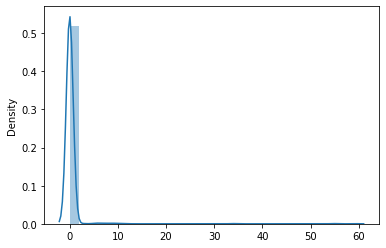

In [ ]:
from tqdm import tqdm
graph = [];
projectSimulation = CacheSimulator();

for i in tqdm(range(1,1000)):
  totalFiles = 10000;
  totalRequests = 20000; 
  cacheSize = 1000;
  fileRequestRate = 5000; 
  fileSizeMean = 1;
  filePopularityMean = 2;
  networkBandwidth = i;
  inboundBandwidth = 15;
  D_StandardDeviation = 0.4;
  D_Mean = 0.5;

  projectSimulation.setParameters(totalFiles, totalRequests, cacheSize, fileRequestRate, fileSizeMean, filePopularityMean, networkBandwidth, inboundBandwidth, D_StandardDeviation, D_Mean);
  graph.append(projectSimulation.simulate("largestFirst", True, False, 3));

#largestFirst
sns.distplot(graph);
plt.show();